In [916]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import warnings
import skfuzzy as fuzz
import skfuzzy.membership as mf
import sklearn.metrics
import seaborn as sns

In [903]:
columns = pd.read_csv('sepsis/1.csv').columns
columns



Index(['heart_rate', 'bp_systolic', 'bp_diastolic', 'map', 'resp', 'temp',
       'spo2', 'fio2', 'wbc', 'bun', 'bilirubin', 'creatinine', 'lactate',
       'platelets', 'ph', 'pco2', 'po2', 'bicarbonate', 'hemoglobin',
       'hematocrit', 'potassium', 'chloride', 'gcs', 'age', 'sirs', 'qsofa',
       'sepsis_icd'],
      dtype='object')

In [904]:
#get random patients from data file
randomlist_sepsis = []
randomlist_nosepsis = []
for i in range(0,125):
    n  = random.randint(1,1000)
    randomlist_sepsis.append(n)
    n = random.randint(1,1000)
    randomlist_nosepsis.append(n)


In [905]:
data = np.zeros((250,27))
warnings.filterwarnings('ignore')
count=0
for i in randomlist_nosepsis:
    file_path = 'no_sepsis/' + str(i) + '.csv'
    nosepsis_data = pd.read_csv(file_path)
    mean_data = np.nanmean(nosepsis_data, axis=0)
    data[count]=mean_data
    count+=1
    

for i in randomlist_sepsis:
    file_path = 'sepsis/' + str(i) + '.csv'
    sepsis_data = pd.read_csv(file_path)
    mean_data = np.nanmean(sepsis_data, axis=0)
    data[count]= mean_data
    count+=1

df = pd.DataFrame(data=data, columns=columns)
df



,heart_rate,bp_systolic,bp_diastolic,map,resp,temp,spo2,fio2,wbc,bun,...,bicarbonate,hemoglobin,hematocrit,potassium,chloride,gcs,age,sirs,qsofa,sepsis_icd
0,64.208333,131.000000,54.208333,73.000000,19.958333,36.692130,95.041667,NaN,8.000000,25.550000,...,23.800000,9.000000,26.600000,3.735000,96.450000,15.000000,80.80,0.000000,0.000000,0.0
1,70.181818,110.363636,53.000000,71.151514,20.636364,36.797980,96.181818,NaN,14.000000,18.272727,...,23.727273,12.421739,34.231818,4.350000,107.636364,13.272727,76.22,0.291667,0.291667,0.0
2,100.375000,129.791667,78.500000,89.750000,17.708333,36.817130,98.958333,40.000000,9.000000,19.263158,...,21.736842,11.000000,28.641667,4.373684,114.947368,15.000000,60.59,0.208333,0.000000,0.0
3,89.954545,139.727273,52.500000,75.045455,18.000000,36.924242,99.045455,NaN,10.617647,37.823529,...,23.176471,9.094118,26.747059,4.088235,107.588235,13.318182,83.44,0.272727,0.227273,0.0
4,74.826087,116.304348,58.869565,73.695652,17.695652,36.190821,95.434783,NaN,10.860870,25.000000,...,27.000000,11.513043,33.986957,4.821739,104.000000,14.826087,86.58,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,103.333333,106.190476,66.714286,94.666667,19.636364,36.325758,97.428571,54.545455,34.633333,28.500000,...,15.666667,11.100000,34.633333,3.433333,111.666667,6.761905,88.42,0.909091,0.318182,1.0
246,85.333333,128.500000,53.375000,72.541667,25.833333,37.780093,84.083333,100.000000,21.556522,43.478261,...,24.217391,9.582609,29.934783,4.504348,99.913043,3.681818,62.45,1.000000,0.916667,1.0
247,81.000000,115.227273,60.227273,83.863636,10.130435,36.393939,99.590909,40.454545,14.533333,7.333333,...,18.142857,9.100000,25.666667,3.630435,102.652174,12.954545,61.27,0.043478,0.000000,1.0
248,103.666667,118.541667,55.500000,71.541667,17.291667,37.869565,99.541667,NaN,10.978947,37.000000,...,16.736842,11.963158,33.189474,3.915789,97.736842,10.173913,59.09,0.500000,0.250000,1.0


In [906]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 27 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   heart_rate    250 non-null    float64
 1   bp_systolic   250 non-null    float64
 2   bp_diastolic  250 non-null    float64
 3   map           250 non-null    float64
 4   resp          250 non-null    float64
 5   temp          250 non-null    float64
 6   spo2          250 non-null    float64
 7   fio2          57 non-null     float64
 8   wbc           250 non-null    float64
 9   bun           250 non-null    float64
 10  bilirubin     116 non-null    float64
 11  creatinine    250 non-null    float64
 12  lactate       147 non-null    float64
 13  platelets     250 non-null    float64
 14  ph            171 non-null    float64
 15  pco2          166 non-null    float64
 16  po2           166 non-null    float64
 17  bicarbonate   250 non-null    float64
 18  hemoglobin    250 non-null    

from the dataset info I've noticed that fio2 value is not accurate so I will drop this column from the dataset. This might be because of lack of measurement.

<AxesSubplot:>

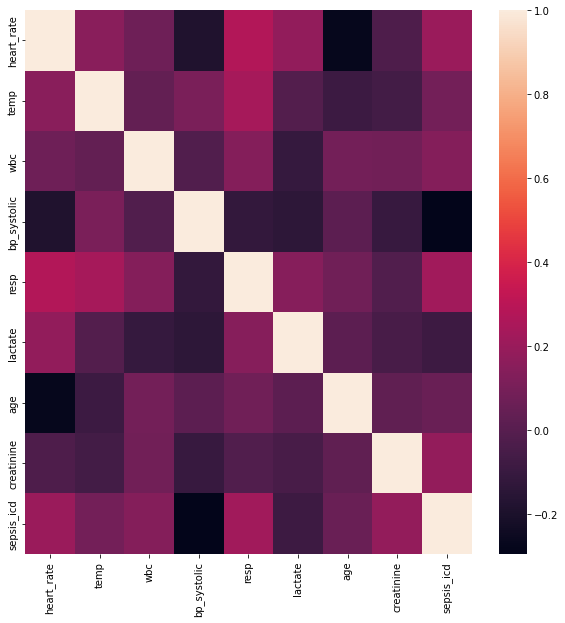

In [907]:
categorical_cols = ['heart_rate','temp','wbc','bp_systolic','resp','lactate','age','creatinine','sepsis_icd']
df_sepsis = df[categorical_cols]
corr_matrix = df_sepsis.corr()
fig, ax = plt.subplots(figsize =(10,10))
sns.heatmap(corr_matrix)

In [908]:
#discretization process on continuous features
#dataset['Age']=pd.qcut(dataset['Age'], q=3,labels =[ 'YOUNG','MIDDLE AGE','OLD']) 
#df_sepsis['lactate'] = df_sepsis['lactate'].fillna(float(df_sepsis['lactate'].mean(skipna=True)))
df_sepsis.sample(n=20)




,heart_rate,temp,wbc,bp_systolic,resp,lactate,age,creatinine,sepsis_icd
190,68.173913,35.990338,13.685000,102.086957,20.173913,2.000000,72.16,2.115000,1.0
90,91.833333,37.376852,16.300000,157.875000,25.750000,NaN,49.30,0.500000,0.0
191,76.666667,37.368055,9.191667,142.208333,17.208333,1.256522,91.40,2.383333,1.0
241,100.083333,36.849537,15.547826,105.625000,18.500000,NaN,71.63,5.578261,1.0
92,80.894737,35.711111,25.123529,97.052632,19.631579,0.900000,53.31,3.654545,0.0
152,94.000000,37.691919,3.287500,103.545455,20.409091,NaN,63.38,0.600000,1.0
66,69.363636,36.593434,10.500000,109.363636,16.545455,1.300000,73.88,1.059091,0.0
16,77.260870,36.437198,10.100000,120.956522,18.913043,1.200000,91.40,1.100000,0.0
18,93.625000,36.837963,8.713043,103.666667,14.375000,NaN,36.46,0.382609,0.0
54,80.894737,37.096492,7.600000,140.578947,14.052632,4.021739,61.33,1.000000,0.0


In [909]:
df_sepsis['wbc'].max()

119.90000000000002

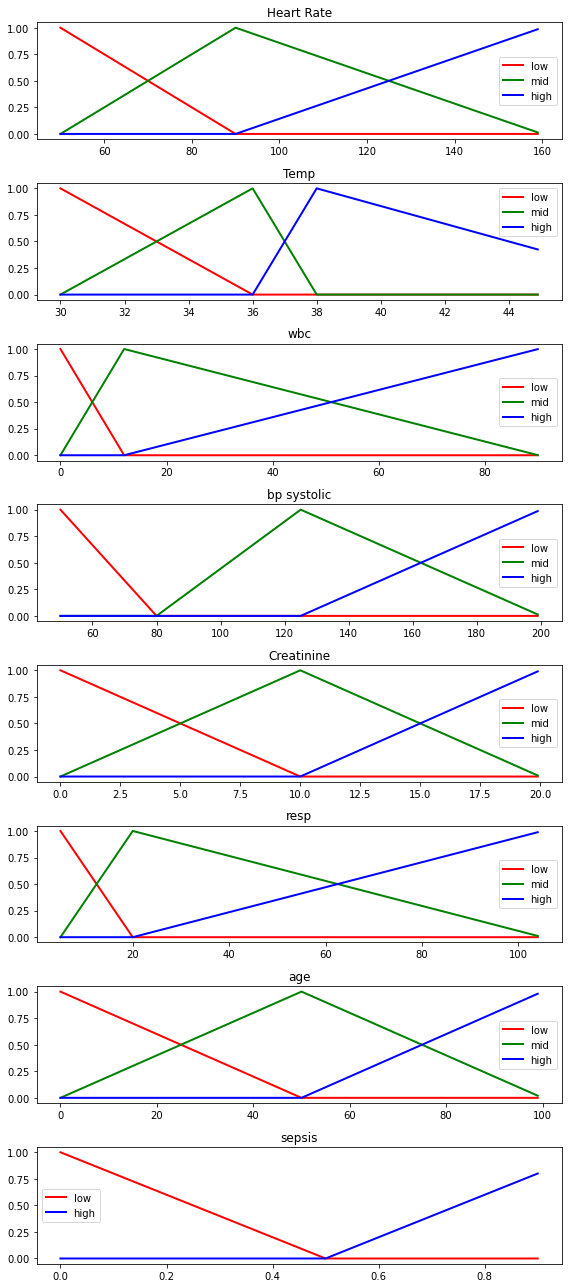

In [910]:
x_heart_rate = np.arange(50,160,1)
x_temp = np.arange(30,45,0.1)
x_wbc = np.arange(0,90,0.1)
x_bp_systolic = np.arange(50,200,1)
x_creatinine = np.arange(0,20,0.1)
x_resp = np.arange(5,105,1)
#x_lactate = np.arange(0,30,0.1)
x_age = np.arange(0,100,1)
y_sepsis = np.arange(0,1,0.1)


x_heart_rate_low = mf.trimf(x_heart_rate,[-20,50,90])
x_heart_rate_mid = mf.trimf(x_heart_rate,[50,90,160])
x_heart_rate_high = mf.trimf(x_heart_rate,[90,160,200])

x_temp_low = mf.trimf(x_temp,[-20,30,36])
x_temp_mid = mf.trimf(x_temp,[30,36,38])
x_temp_high = mf.trimf(x_temp,[36,38,50])

x_wbc_low = mf.trimf(x_wbc,[-30,0,12])
x_wbc_mid = mf.trimf(x_wbc,[0,12,90])
x_wbc_high = mf.trimf(x_wbc,[12,90,180])

x_bp_systolic_low = mf.trimf(x_bp_systolic,[-20,50,80])
x_bp_systolic_mid = mf.trimf(x_bp_systolic,[80,125,200])
x_bp_systolic_high = mf.trimf(x_bp_systolic,[125,200,400])

x_creatinine_low = mf.trimf(x_creatinine,[-20,0,10])
x_creatinine_mid = mf.trimf(x_creatinine,[0,10,20])
x_creatinine_high = mf.trimf(x_creatinine,[10,20,50])


x_resp_low = mf.trimf(x_resp,[-20,5,20])
x_resp_mid = mf.trimf(x_resp,[5,20,105])
x_resp_high = mf.trimf(x_resp,[20,105,150])

#x_lactate_low = mf.trimf(x_lactate,[-20,0,15])
#x_lactate_mid = mf.trimf(x_lactate,[0,15,30])
#x_lactate_high = mf.trimf(x_lactate,[15,30,50])

x_age_low = mf.trimf(x_age,[-20,0,50])
x_age_mid = mf.trimf(x_age,[0,50,100])
x_age_high = mf.trimf(x_age,[50,100,200])

y_sepsis_low  = mf.trimf(y_sepsis,[-0.5,0,0.5])
#y_sepsis_mid = mf.trimf(y_sepsis,[0,0.5,1])
y_sepsis_high = mf.trimf(y_sepsis,[0.5,1,1.5])

fig, (ax0,ax1,ax2,ax3,ax4,ax5,ax7,ax8) = plt.subplots(nrows=8, figsize = (8,18))

ax0.plot(x_heart_rate, x_heart_rate_low, 'r', linewidth = 2, label='low')
ax0.plot(x_heart_rate, x_heart_rate_mid, 'g', linewidth = 2, label='mid')
ax0.plot(x_heart_rate, x_heart_rate_high, 'b', linewidth = 2, label='high')
ax0.set_title('Heart Rate')
ax0.legend()

ax1.plot(x_temp, x_temp_low, 'r', linewidth = 2, label='low')
ax1.plot(x_temp, x_temp_mid, 'g', linewidth = 2, label='mid')
ax1.plot(x_temp, x_temp_high, 'b', linewidth = 2, label='high')
ax1.set_title('Temp')
ax1.legend()

ax2.plot(x_wbc, x_wbc_low, 'r', linewidth = 2, label='low')
ax2.plot(x_wbc, x_wbc_mid, 'g', linewidth = 2, label='mid')
ax2.plot(x_wbc, x_wbc_high, 'b', linewidth = 2, label='high')
ax2.set_title('wbc')
ax2.legend()

ax3.plot(x_bp_systolic, x_bp_systolic_low, 'r', linewidth = 2, label='low')
ax3.plot(x_bp_systolic, x_bp_systolic_mid, 'g', linewidth = 2, label='mid')
ax3.plot(x_bp_systolic, x_bp_systolic_high, 'b', linewidth = 2, label='high')
ax3.set_title('bp systolic')
ax3.legend()

ax4.plot(x_creatinine, x_creatinine_low, 'r', linewidth = 2, label='low')
ax4.plot(x_creatinine, x_creatinine_mid, 'g', linewidth = 2, label='mid')
ax4.plot(x_creatinine, x_creatinine_high, 'b', linewidth = 2, label='high')
ax4.set_title('Creatinine')
ax4.legend()

ax5.plot(x_resp, x_resp_low, 'r', linewidth = 2, label='low')
ax5.plot(x_resp, x_resp_mid, 'g', linewidth = 2, label='mid')
ax5.plot(x_resp, x_resp_high, 'b', linewidth = 2, label='high')
ax5.set_title('resp')
ax5.legend()

#ax6.plot(x_lactate, x_lactate_low, 'r', linewidth = 2, label='low')
#ax6.plot(x_lactate, x_lactate_mid, 'g', linewidth = 2, label='mid')
#ax6.plot(x_lactate, x_lactate_high, 'b', linewidth = 2, label='high')
#ax6.set_title('lactate')
#ax6.legend()

ax7.plot(x_age, x_age_low, 'r', linewidth = 2, label='low')
ax7.plot(x_age, x_age_mid, 'g', linewidth = 2, label='mid')
ax7.plot(x_age, x_age_high, 'b', linewidth = 2, label='high')
ax7.set_title('age')
ax7.legend()

ax8.plot(y_sepsis, y_sepsis_low, 'r', linewidth = 2, label='low')
#ax8.plot(y_sepsis, y_sepsis_mid, 'g', linewidth = 2, label='mid')
ax8.plot(y_sepsis, y_sepsis_high, 'b', linewidth = 2, label='high')
ax8.set_title('sepsis')
ax8.legend()


plt.tight_layout()



#### IMPLEMENTING RULES

In [917]:
y_pred = []
for i in range(len(df_sepsis)):
    
    this_heart_rate = df_sepsis.iloc[i:i+1,:]['heart_rate']
    this_temp = df_sepsis.iloc[i:i+1,:]['temp']
    this_wbc = df_sepsis.iloc[i:i+1,:]['wbc']
    this_bp_systolic = df_sepsis.iloc[i:i+1,:]['bp_systolic']
    this_creatinine = df_sepsis.iloc[i:i+1,:]['creatinine']
    this_resp = df_sepsis.iloc[i:i+1,:]['resp']
    #this_lactate = df_sepsis.iloc[i:i+1,:]['lactate']
    this_age = df_sepsis.iloc[i:i+1,:]['age']
    this_sepsis = df_sepsis.iloc[i:i+1,:]['sepsis_icd']

    heart_rate_fit_low = fuzz.interp_membership(x_heart_rate, x_heart_rate_low, this_heart_rate)
    heart_rate_fit_middle = fuzz.interp_membership(x_heart_rate, x_heart_rate_mid, this_heart_rate)
    heart_rate_fit_high = fuzz.interp_membership(x_heart_rate, x_heart_rate_high, this_heart_rate)

    temp_fit_low = fuzz.interp_membership(x_temp, x_temp_low, this_temp)
    temp_fit_middle = fuzz.interp_membership(x_temp, x_temp_mid, this_temp)
    temp_fit_high = fuzz.interp_membership(x_temp, x_temp_high, this_temp)

    wbc_fit_low = fuzz.interp_membership(x_wbc, x_wbc_low, this_wbc)
    wbc_fit_middle = fuzz.interp_membership(x_wbc, x_wbc_mid, this_wbc)
    wbc_fit_high = fuzz.interp_membership(x_wbc, x_wbc_high, this_wbc)

    bp_systolic_fit_low = fuzz.interp_membership(x_bp_systolic, x_bp_systolic_low, this_bp_systolic)
    bp_systolic_fit_middle = fuzz.interp_membership(x_bp_systolic, x_bp_systolic_mid, this_bp_systolic)
    bp_systolic_fit_high = fuzz.interp_membership(x_bp_systolic, x_bp_systolic_high, this_bp_systolic)

    creatinine_fit_low = fuzz.interp_membership(x_creatinine, x_creatinine_low, this_creatinine)
    creatinine_fit_middle = fuzz.interp_membership(x_creatinine, x_creatinine_mid, this_creatinine)
    creatinine_fit_high = fuzz.interp_membership(x_creatinine, x_creatinine_high, this_creatinine)
    

    resp_fit_low = fuzz.interp_membership(x_resp, x_resp_low, this_resp)
    resp_fit_middle = fuzz.interp_membership(x_resp, x_resp_mid, this_resp)
    resp_fit_high = fuzz.interp_membership(x_resp, x_resp_high, this_resp)

    #lactate_fit_low = fuzz.interp_membership(x_lactate, x_lactate_low, this_lactate)
    #lactate_fit_middle = fuzz.interp_membership(x_lactate, x_lactate_mid, this_lactate)
    #lactate_fit_high = fuzz.interp_membership(x_lactate, x_lactate_high, this_lactate)

    age_fit_low = fuzz.interp_membership(x_age, x_age_low, this_age)
    age_fit_middle = fuzz.interp_membership(x_age, x_age_mid, this_age)
    age_fit_high = fuzz.interp_membership(x_age, x_age_high, this_age)



   
    #rule1 = np.fmin(np.fmin(np.fmin(np.fmin(age_fit_middle,heart_rate_fit_middle),creatinine_fit_high),bp_systolic_fit_high), y_sepsis_high)
    #rule2 = np.fmin(np.fmin(np.fmin(np.fmin(age_fit_high,temp_fit_middle),heart_rate_fit_low), creatinine_fit_low), y_sepsis_low)
    #rule3 = np.fmin(np.fmin(np.fmin(np.fmin(heart_rate_fit_low,wbc_fit_low),creatinine_fit_low),bp_systolic_fit_middle ), y_sepsis_low) 
    #rule4 = np.fmin(np.fmin(np.fmin(np.fmin(np.fmin(np.fmin(age_fit_middle, temp_fit_middle), wbc_fit_low), creatinine_fit_high ), bp_systolic_fit_low ), resp_fit_low), y_sepsis_high )
    ##np.fmin(np.fmin(np.fmin(np.fmin(age_fit_high,heart_rate_fit_high),wbc_fit_low),resp_fit_middle), y_sepsis_high)
    ##np.fmin(np.fmin(np.fmin(np.fmin(temp_fit_middle,wbc_fit_high),creatinine_fit_middle), resp_fit_low), y_sepsis_low)
    #rule7 = np.fmin(np.fmin(np.fmin(np.fmin(np.fmin(age_fit_middle,heart_rate_fit_middle),wbc_fit_low), creatinine_fit_middle), bp_systolic_fit_low), y_sepsis_high)
    #rule8 = np.fmin(np.fmin(np.fmin(np.fmin(age_fit_high,heart_rate_fit_middle),wbc_fit_high), creatinine_fit_low), y_sepsis_low)


    
    rule1 = np.fmin(np.fmin(np.fmin(heart_rate_fit_middle,temp_fit_middle),resp_fit_middle),y_sepsis_low)
    rule2 = np.fmin(np.fmin(np.fmin(bp_systolic_fit_middle,resp_fit_middle),heart_rate_fit_middle),y_sepsis_low)
    rule3 = np.fmin(np.fmin(np.fmin(temp_fit_middle,wbc_fit_high),age_fit_high),y_sepsis_low)
    rule4 = np.fmin(np.fmin(np.fmin(temp_fit_middle,wbc_fit_middle),resp_fit_middle),y_sepsis_low)
    
    rule5 = np.fmin(np.fmin(np.fmin(temp_fit_high,heart_rate_fit_high),wbc_fit_high),y_sepsis_high)
    rule6 = np.fmin(np.fmin(np.fmin(resp_fit_high,wbc_fit_low),temp_fit_high),y_sepsis_high)
    rule7 = np.fmin(np.fmin(np.fmin(age_fit_high,wbc_fit_high),heart_rate_fit_low),y_sepsis_high)
    rule8 = np.fmin(np.fmin(np.fmin(np.fmin(wbc_fit_low,resp_fit_high),temp_fit_high),heart_rate_fit_high),y_sepsis_high)
    
    y_low = np.fmax(np.fmax(np.fmax(rule1,rule2),rule3),rule4)
    y_high = np.fmax(np.fmax(np.fmax(rule6,rule7),rule8),rule5)

    y_pred_sepsis = np.fmax(y_low,y_high)

    defuzzy = fuzz.defuzz(y_sepsis, y_pred_sepsis, 'mom')
    ms_value = fuzz.interp_membership(y_sepsis, y_pred_sepsis, defuzzy)
    y_pred.append(ms_value)
    






#### CONFUSION MATRIX

In [912]:
new_array = []
for i in range(250):
    if y_pred[i] >= 0.50:
        new_array.append(1)
    
    if y_pred[i] < 0.50:
        new_array.append(0)

sklearn.metrics.confusion_matrix(df_sepsis['sepsis_icd'].to_numpy(), new_array)

array([[ 20, 105],
       [ 15, 110]], dtype=int64)

#### ACCURACY SCORE

In [913]:
sklearn.metrics.accuracy_score(df_sepsis['sepsis_icd'].to_numpy(), new_array)

0.52

#### ROC AUC SCORE

In [914]:
sklearn.metrics.roc_auc_score(df_sepsis['sepsis_icd'].to_numpy(), new_array)

0.52

#### F1 SCORE

In [915]:
sklearn.metrics.f1_score(df_sepsis['sepsis_icd'].to_numpy(), new_array)

0.6470588235294118